# K Means Clustering implementation 

In [45]:
# Importing importing libraries 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # Importing the important datasets 
import pandas as pd
import numpy as np
%matplotlib inline 

In [46]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)
# centres=3 means no. of clusters will be 3

In [47]:
X.shape

(1000, 2)

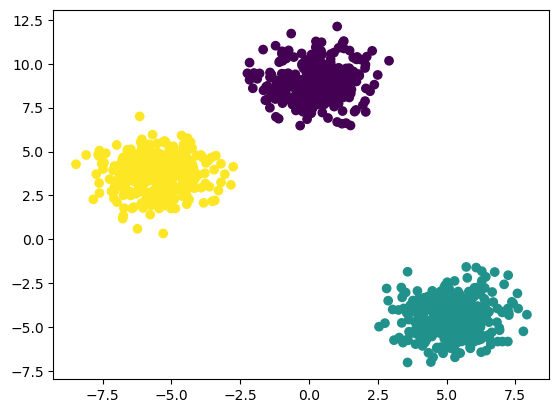

In [48]:
plt.scatter(X[:,0],X[:,1],c=y)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [50]:
from sklearn.cluster import KMeans
# Importing the Kmeans clustering 

In [55]:
# Manual Process 
# Elbow Method to select the K value 
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [56]:
wcss

[34827.57682552023,
 7935.437286145418,
 1319.2730531585605,
 1140.4677884655125,
 991.8899785187884,
 854.2929980760775,
 756.3838662795159,
 666.0348918487349,
 579.0561206426619,
 534.0365634987969]

### Plotting the Elbow Curve 

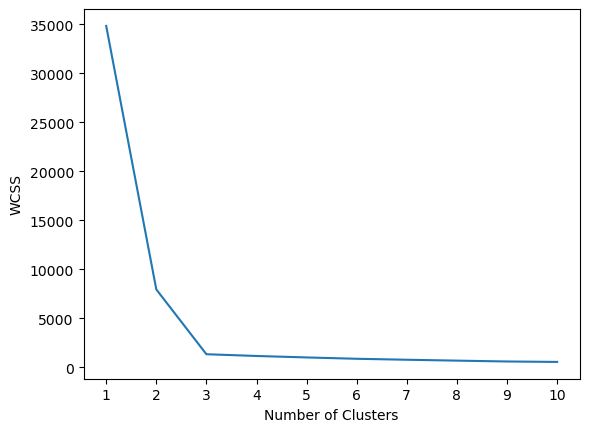

In [57]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
# We will be selecting 3 as the value as the elbow Curve is taking the turn from the point as 3

### Now we will be making the Model 

In [59]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [61]:
y_labels=kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


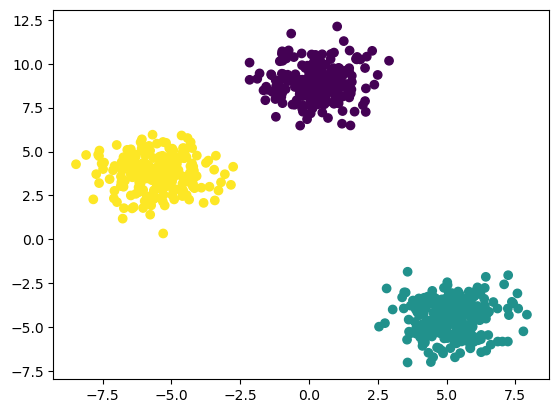

In [62]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

##### This is a bit diffficult when it comes to doing it manually for the big data 
### Now automating the entire process

In [73]:
## knee locator
!pip install kneed

In [74]:
from kneed import KneeLocator # For automating the entire process

In [76]:
# here the value is decreasing in the knee graph so we will be using the Convex for increasing use Concave
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

3

#### We did a lot of effort to find the number of clusters with this just 2 lines of code let us to find the number of clusters

In [78]:
## Silhoutte score
from sklearn.metrics import silhouette_score

In [79]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [80]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4907093255057165,
 0.33898120490439754,
 0.34575016442546685,
 0.34266094681184495,
 0.3447307665220656,
 0.34235445955248645]

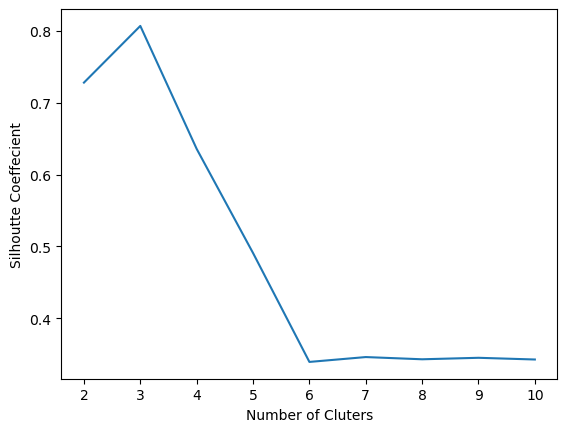

In [81]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()